In [1]:
using GeometricIntegrators
using GeometricIntegrators.Integrators.SPARK

In [2]:
using Plots

In [3]:
const Δt = 0.1
const nt = 1000
;

In [4]:
set_config(:nls_atol, 8eps())
set_config(:nls_rtol, 2eps())
set_config(:nls_stol_break, Inf)
;

In [5]:
V(x₁,x₂) = (x₁-x₂)^2/2

V (generic function with 1 method)

In [6]:
hamiltonian(t,q,p,k) = p[1]^2/2 + p[1] * p[2] + k * V(q[1],q[2])

hamiltonian (generic function with 1 method)

In [7]:
function ϕ(t,q,p,ϕ,R)
    ϕ[1] = p[1]^2 + p[2]^2 + q[1]^2 + q[2]^2 - R^2
    ϕ[2] = p[2]
end

ϕ (generic function with 1 method)

In [8]:
function v(t,q,p,v)
    v[1] = p[1] + p[2]
    v[2] = p[1]
end

v (generic function with 1 method)

In [9]:
function f(t,q,p,f,k)
    f[1] = - k * (q[1] - q[2])
    f[2] = - k * (q[1] - q[2])
end

f (generic function with 1 method)

In [10]:
function u(t,q,p,λ,u)
    u[1] = + p[1] * λ[1] 
    u[2] = + p[2] * λ[1] + λ[2]
end

u (generic function with 1 method)

In [11]:
function g(t,q,p,λ,g)
    g[1] = - q[1] * λ[1]
    g[2] = - q[2] * λ[1]
end

g (generic function with 1 method)

In [12]:
function compute_energy_error(t, q::DataSeries{T}, p::DataSeries{T}) where {T}
    h = SDataSeries(T, q.nt)
    e = SDataSeries(T, q.nt)

    for i in axes(q,2)
        h[i] = hamiltonian(t[i], q[:,i], p[:,i])
        e[i] = (h[i] - h[0]) / h[0]
    end

    (h, e)
end

compute_energy_error (generic function with 1 method)

In [13]:
const R  = 1.0
const k  = 1.0
q₀ = [1.0, 0.0]
p₀ = [0.0, sqrt(R^2 - q₀[1]^2 - q₀[2]^2)]
λ₀ = [0.0, 0.0]

2-element Array{Float64,1}:
 0.0
 0.0

In [14]:
hamiltonian(t,q,p) = hamiltonian(t,q,p,k)
ϕ(t,q,p,z) = ϕ(t,q,p,z,R)
f(t,q,p,z) = f(t,q,p,z,k)

f (generic function with 2 methods)

In [15]:
ode = PODE(v, f, q₀, p₀)
int = IntegratorIPRK(ode, TableauIPRK(:GLRK1, 1, getCoefficientsGLRK(1)), Δt)
sol = Solution(ode, Δt, nt)
integrate!(int, sol)
;

In [16]:
H, ΔH = compute_energy_error(sol.t, sol.q, sol.p);

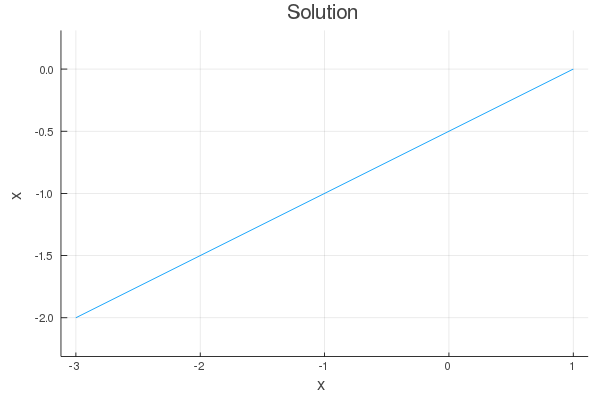

In [17]:
plot(sol.q[1,:], sol.q[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Solution", aspectratio=1, fmt=:png)

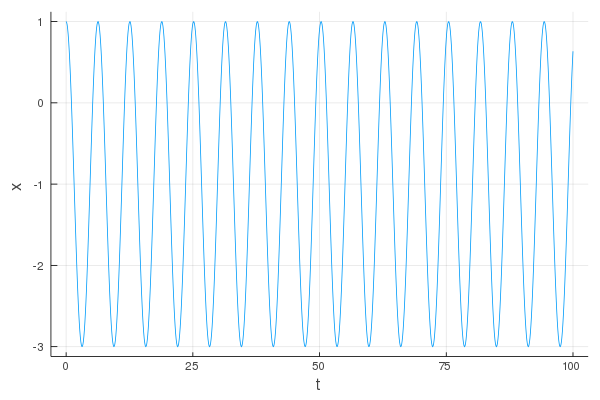

In [18]:
plot(sol.t[:], sol.q[1,:], legend=:none, xlab="t", ylab="x₁",fmt=:png)

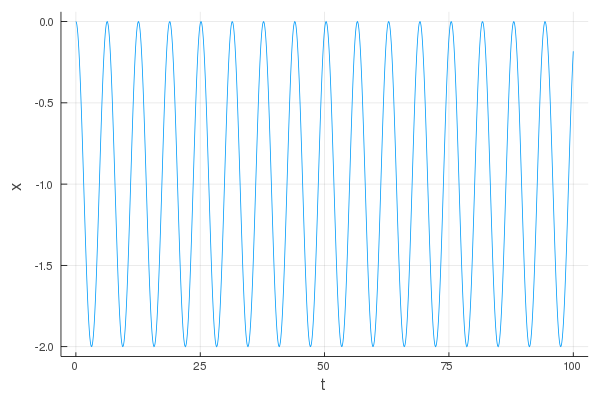

In [19]:
plot(sol.t[:], sol.q[2,:], legend=:none, xlab="t", ylab="x₁",fmt=:png)

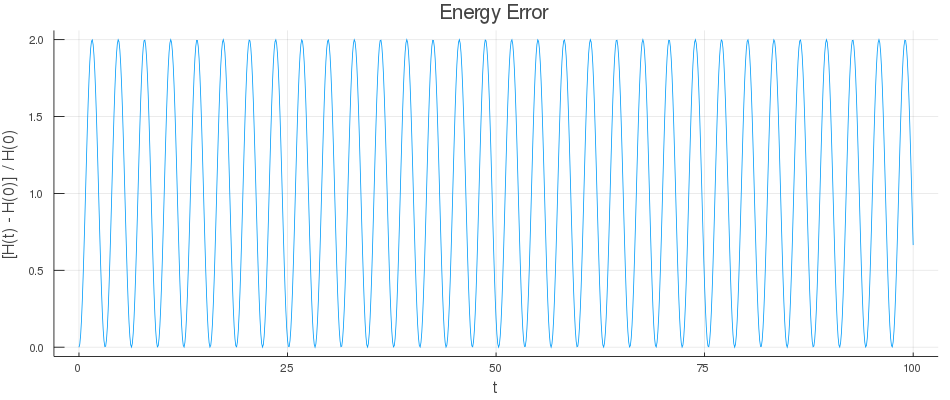

In [20]:
plot(sol.t, ΔH, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Energy Error", size=(950, 400), fmt=:png)

In [21]:
dae = PDAE(v, f, u, g, ϕ, q₀, p₀, λ₀)
int = IntegratorHPARK(dae, getTableauHPARKGLRK(1), Δt)
sol = Solution(dae, Δt, nt)
integrate!(int, sol)
;

In [22]:
H, ΔH = compute_energy_error(sol.t, sol.q, sol.p);

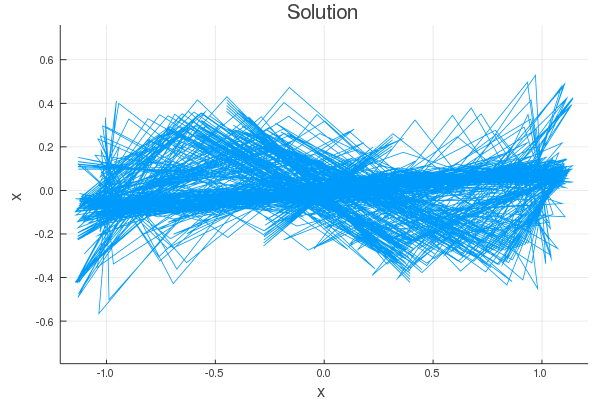

In [23]:
plot(sol.q[1,:], sol.q[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Solution", aspectratio=1, fmt=:png)

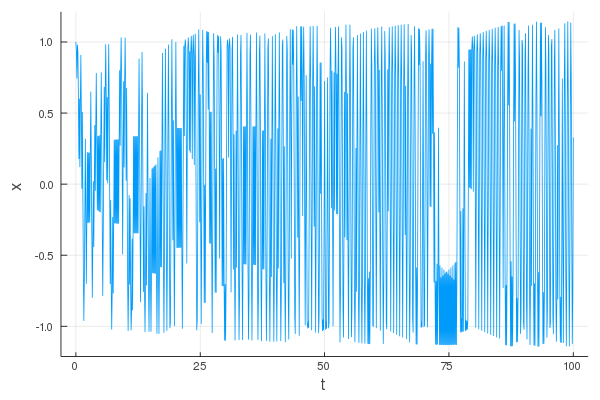

In [24]:
plot(sol.t[:], sol.q[1,:], legend=:none, xlab="t", ylab="x₁",fmt=:png)

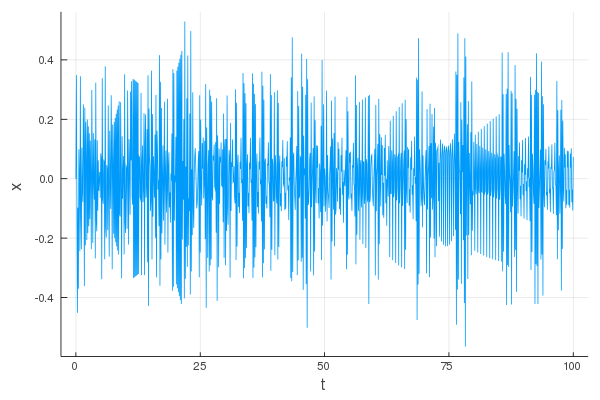

In [25]:
plot(sol.t[:], sol.q[2,:], legend=:none, xlab="t", ylab="x₁",fmt=:png)

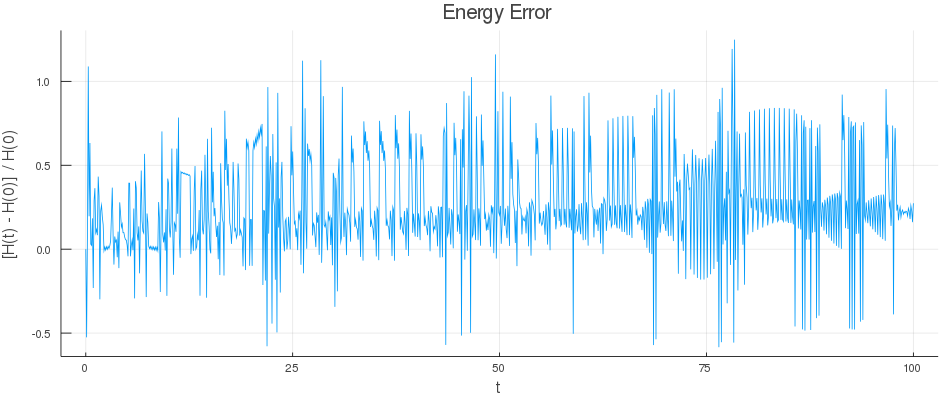

In [26]:
plot(sol.t, ΔH, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Energy Error", size=(950, 400), fmt=:png)